In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data/dogscats/"

In [5]:
sz = 224

In [6]:
!ls {PATH}

models	test  tmp  train  valid


In [7]:
!ls {PATH}valid

cats  dogs


In [8]:
files = !ls {PATH}valid/cats/ | head
files

['cat.1001.jpg',
 'cat.10016.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg',
 'cat.10064.jpg',
 'cat.10071.jpg',
 'cat.10091.jpg',
 'cat.10103.jpg',
 'cat.10104.jpg']

In [9]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')

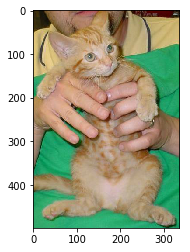

In [10]:
plt.imshow(img);

In [11]:
img.shape

(499, 336, 3)

In [12]:
img = img[None]

In [13]:
img.shape

(1, 499, 336, 3)

In [14]:
img[:, :4, :4].shape

(1, 4, 4, 3)

In [15]:
ImageClassifierData

fastai.dataset.ImageClassifierData

In [16]:
fnames, lbls, all_lbls = read_dirs(PATH, 'train')

In [17]:
all_lbls

['cats', 'dogs']

In [18]:
label2idx = {v:k for k,v in enumerate(all_lbls)}

In [19]:
label2idx

{'cats': 0, 'dogs': 1}

In [20]:
lbls[::-1]

['dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 

In [21]:
idxs = [label2idx[lbl] for lbl in lbls]; idxs

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [22]:
c = len(all_lbls)
label_arr = np.array(idxs, dtype=int)

In [23]:
label_arr

array([0, 0, 0, ..., 1, 1, 1])

In [24]:
trn,val = [folder_source(PATH, o) for o in ('train', 'valid')]

In [25]:
trn

(['train/cats/cat.6984.jpg',
  'train/cats/cat.9101.jpg',
  'train/cats/cat.1262.jpg',
  'train/cats/cat.9819.jpg',
  'train/cats/cat.8766.jpg',
  'train/cats/cat.227.jpg',
  'train/cats/cat.9495.jpg',
  'train/cats/cat.12341.jpg',
  'train/cats/cat.2315.jpg',
  'train/cats/cat.11612.jpg',
  'train/cats/cat.3044.jpg',
  'train/cats/cat.7875.jpg',
  'train/cats/cat.10721.jpg',
  'train/cats/cat.2153.jpg',
  'train/cats/cat.1424.jpg',
  'train/cats/cat.11450.jpg',
  'train/cats/cat.8928.jpg',
  'train/cats/cat.8210.jpg',
  'train/cats/cat.3206.jpg',
  'train/cats/cat.7794.jpg',
  'train/cats/cat.2072.jpg',
  'train/cats/cat.10640.jpg',
  'train/cats/cat.1343.jpg',
  'train/cats/cat.8847.jpg',
  'train/cats/cat.9576.jpg',
  'train/cats/cat.308.jpg',
  'train/cats/cat.7400.jpg',
  'train/cats/cat.12422.jpg',
  'train/cats/cat.3125.jpg',
  'train/cats/cat.8685.jpg',
  'train/cats/cat.7956.jpg',
  'train/cats/cat.146.jpg',
  'train/cats/cat.12260.jpg',
  'train/cats/cat.2234.jpg',
  'train/c

In [28]:
test_fnames = read_dir(PATH, 'test')

In [29]:
test_fnames

['test/10592.jpg',
 'test/7217.jpg',
 'test/3653.jpg',
 'test/4382.jpg',
 'test/2924.jpg',
 'test/10.jpg',
 'test/10916.jpg',
 'test/12374.jpg',
 'test/1871.jpg',
 'test/11645.jpg',
 'test/539.jpg',
 'test/5435.jpg',
 'test/4706.jpg',
 'test/9710.jpg',
 'test/6164.jpg',
 'test/10754.jpg',
 'test/8108.jpg',
 'test/11483.jpg',
 'test/377.jpg',
 'test/3815.jpg',
 'test/5273.jpg',
 'test/4544.jpg',
 'test/3491.jpg',
 'test/11807.jpg',
 'test/2762.jpg',
 'test/7055.jpg',
 'test/6326.jpg',
 'test/10673.jpg',
 'test/8027.jpg',
 'test/296.jpg',
 'test/3734.jpg',
 'test/5192.jpg',
 'test/4463.jpg',
 'test/12455.jpg',
 'test/1952.jpg',
 'test/11726.jpg',
 'test/2681.jpg',
 'test/5516.jpg',
 'test/6245.jpg',
 'test/10835.jpg',
 'test/1790.jpg',
 'test/12293.jpg',
 'test/11564.jpg',
 'test/458.jpg',
 'test/5354.jpg',
 'test/8900.jpg',
 'test/4625.jpg',
 'test/1079.jpg',
 'test/6083.jpg',
 'test/3572.jpg',
 'test/2843.jpg',
 'test/7136.jpg',
 'test/6407.jpg',
 'test/12059.jpg',
 'test/1556.jpg',
 '

In [30]:
full_path = os.path.join(PATH, 'test')
fnames = iglob(f"{full_path}/*.*")

In [31]:
f = next(fnames); f

'data/dogscats/test/10592.jpg'

In [32]:
[os.path.relpath(f, PATH) for f in fnames]

['test/7217.jpg',
 'test/3653.jpg',
 'test/4382.jpg',
 'test/2924.jpg',
 'test/10.jpg',
 'test/10916.jpg',
 'test/12374.jpg',
 'test/1871.jpg',
 'test/11645.jpg',
 'test/539.jpg',
 'test/5435.jpg',
 'test/4706.jpg',
 'test/9710.jpg',
 'test/6164.jpg',
 'test/10754.jpg',
 'test/8108.jpg',
 'test/11483.jpg',
 'test/377.jpg',
 'test/3815.jpg',
 'test/5273.jpg',
 'test/4544.jpg',
 'test/3491.jpg',
 'test/11807.jpg',
 'test/2762.jpg',
 'test/7055.jpg',
 'test/6326.jpg',
 'test/10673.jpg',
 'test/8027.jpg',
 'test/296.jpg',
 'test/3734.jpg',
 'test/5192.jpg',
 'test/4463.jpg',
 'test/12455.jpg',
 'test/1952.jpg',
 'test/11726.jpg',
 'test/2681.jpg',
 'test/5516.jpg',
 'test/6245.jpg',
 'test/10835.jpg',
 'test/1790.jpg',
 'test/12293.jpg',
 'test/11564.jpg',
 'test/458.jpg',
 'test/5354.jpg',
 'test/8900.jpg',
 'test/4625.jpg',
 'test/1079.jpg',
 'test/6083.jpg',
 'test/3572.jpg',
 'test/2843.jpg',
 'test/7136.jpg',
 'test/6407.jpg',
 'test/12059.jpg',
 'test/1556.jpg',
 'test/6560.jpg',
 't

In [33]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(f_model=resnet34, sz=224))

In [37]:
trn,val = [folder_source(PATH, o) for o in ('train', 'valid')]
test_fnames = None
datasets = ImageClassifierData.get_ds(FilesIndexArrayDataset, trn, val, tfms=tfms_from_model(f_model=resnet34, sz=224), 
                                      path=PATH, test=test_fnames)

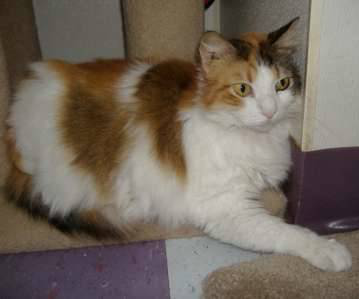

In [55]:
datasets[0].get_x(1000)

In [39]:
data_1 = [f for f in datasets[1]]

In [42]:
data_1[0]

(array([[[-1.19317, -1.19317, -1.17604, ..., -1.12467, -1.15892, -1.17604],
         [-1.19317, -1.19317, -1.17604, ..., -1.17604, -1.15892, -1.17604],
         [-1.21029, -1.21029, -1.17604, ..., -1.24454, -1.15892, -1.17604],
         ..., 
         [ 1.15292,  1.08443,  1.01593, ..., -0.14856, -0.19993, -0.35405],
         [ 1.11867,  1.11867,  1.08443, ..., -0.09718, -0.16568, -0.19993],
         [ 1.11867,  1.08443,  1.08443, ..., -0.18281, -0.19993, -0.21706]],
 
        [[-1.26541, -1.26541, -1.2479 , ..., -1.02031, -1.05532, -1.07283],
         [-1.26541, -1.26541, -1.2479 , ..., -1.07283, -1.05532, -1.07283],
         [-1.28291, -1.28291, -1.2479 , ..., -1.14286, -1.05532, -1.07283],
         ..., 
         [ 0.88796,  0.81793,  0.78291, ..., -0.37255, -0.44258, -0.61765],
         [ 0.87045,  0.85294,  0.85294, ..., -0.33753, -0.42507, -0.46008],
         [ 0.90546,  0.85294,  0.87045, ..., -0.44258, -0.47759, -0.4951 ]],
 
        [[-1.21185, -1.21185, -1.19442, ..., -0.7586

In [91]:
trn[1].min()

0

In [75]:
res = FilesIndexArrayDataset(trn[0], trn[1], tfms_from_model(f_model=resnet34, sz=224)[0], PATH)

In [15]:
ImageClassifierData.is_multi.fdel

In [18]:
tfms_from_model

<function fastai.dataset.tfms_from_model>

In [18]:
ConvLearner.pretrained

<bound method ConvLearner.pretrained of <class 'fastai.conv_learner.ConvLearner'>>

In [29]:
opt_fn = None
s_g = 11
opt = opt_fn or s_g

In [30]:
opt

11